In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import * #Libreria python simbólico

%matplotlib inline

# Objetivos de hoy

0. Interpolación Splines Cúbicos

1. Cálculo numérico - Diferenciación

1. 1. Diferenciación por límite

1. 2. Diferencia hacia adelante

1. 3. Diferencia central

# Splines Cúbicos

Sea $f(x)$ definida en $[a,b]$ y un conjunto de $n+1$ puntos $\lbrace(x_i,y_i)\rbrace$ con $y_i=f(x_i)$, $x_0=a$, $x_n=b$


Sea $S_j(x)$ un $\textbf{polinomio cúbico}$ definido en el intervalo $[x_j,x_{j+1}]$, con $j=0,1,...n-1$


$S_j(x)=a_j+b_j(x-x_j)+c_j(x-x_j)^2+d_j(x-x_j)^3$

Debe cumplir qué:
1. Pase por los nodos: $S_j(x_j)=y_j$ y $S_j(x_{j+1})=y_{j+1}$


2. Primera derivada continua: $S'_j(x_{j+1})=S'_{j+1}(x_{j+1})$


3. Segunda derivada continua: $S''_j(x_{j+1})=S''_{j+1}(x_{j+1})$


4. Una condición de frontera:


4.1.  Condición de frontera natural (libre) $S''(x_0)=S''(x_n)=0$


4.2.  Condición de frontera sujetada (clamped) $S'(x_0)=f'(x_0)$ y $S'(x_n)=f'(x_n)$

In [2]:
def cubic_spline_free(xn,yn):
    x = Symbol('x')
    n=len(xn)-1
    
    S=[]
    
    #Pasen por los nodos
    for j in range(0,n):
        string='a%1.f b%1.f c%1.f d%1.f' %(j,j,j,j)
        a,b,c,d=symbols(string)
        
        Sj=a+b*(x-xn[j])+c*(x-xn[j])**2+d*(x-xn[j])**3
        
        sol_a=solve(Sj.subs(x,xn[j])-yn[j])
        Sj=Sj.subs(a,sol_a[0])

        sol_b=solve(Sj.subs(x,xn[j+1])-yn[j+1],b)
        Sj=Sj.subs(b,sol_b[0])
        
        #Sj=expand(Sj)
        S.append(Sj)
    
    #1 Derivada continua
    for j in range(0,n-1):
        string='a%1.f b%1.f c%1.f d%1.f' %(j,j,j,j)
        a,b,c,d=symbols(string)
        
        DSj=diff(S[j],x)
        DSj1=diff(S[j+1],x)
        
        DS=(DSj-DSj1).subs(x,xn[j+1])
        
        sol_c=solve(DS,c)
        
        S[j]=S[j].subs(c,sol_c[0])
        
        for i in range(0,j):
            S[i]=S[i].subs(c,sol_c[0])
            
    #2 Derivada continua
    for j in range(0,n-1):
        string='a%1.f b%1.f c%1.f d%1.f' %(j,j,j,j)
        a,b,c,d=symbols(string)
        
        DDSj=diff(S[j],x,x)
        DDSj1=diff(S[j+1],x,x)
        
        DDS=(DDSj-DDSj1).subs(x,xn[j+1])
        
        sol_d=solve(DDS,d)
        
        S[j]=S[j].subs(d,sol_d[0])
        
        for i in range(0,j):
            S[i]=S[i].subs(d,sol_d[0])
    
    
    #Fronteras
    string='c%1.f d%1.f' %(n-1,n-1)
    a,b=symbols(string)
    
    #Frontera a
    DDS0=diff(S[0],x,x).subs(x,xn[0])
    
    sol_a=solve(DDS0-0,a)
    
    for j in range(0,n):
        S[j]=S[j].subs(a,sol_a[0])
    
    #Frontera b
    DDSn=diff(S[-1],x,x).subs(x,xn[-1])
    sol_b=solve(DDSn,b)
    
    for j in range(0,n):
        S[j]=S[j].subs(b,sol_b[0])
        S[j]=expand(S[j])
    
    return S

para x entre [ 0.0 , 1.5707963267948966 ] : p(x)= -0.129006137733048*x**3 + 9.38109612890244e-13*x**2 + 0.95492965855052*x
para x entre [ 1.5707963267948966 , 3.141592653589793 ] : p(x)= 0.129006137732867*x**3 - 1.21585420370864*x**2 + 2.86478897565568*x - 1.00000000000128
para x entre [ 3.141592653589793 , 4.71238898038469 ] : p(x)= 0.129006137732779*x**3 - 1.2158542037078*x**2 + 2.86478897565301*x - 0.999999999998453
para x entre [ 4.71238898038469 , 6.283185307179586 ] : p(x)= -0.129006137732794*x**3 + 2.43170840741603*x**2 - 14.3239448782701*x + 25.999999999999


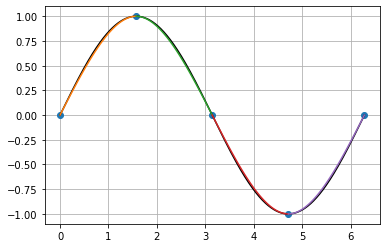

In [3]:
def f(x):
    return np.sin(x)

x=Symbol('x')

xmin=0
xmax=2*np.pi

xreal=np.linspace(xmin,xmax,1000)
yreal=f(xreal)

puntos=5
xn=np.linspace(xmin,xmax,puntos)
yn=f(xn)

plt.plot(xn,yn,'o')
plt.plot(xreal,yreal,color='black')

pol_spl=cubic_spline_free(xn,yn)


for i in range(len(pol_spl)):
    pol_spl_np=lambdify(x,pol_spl[i],"numpy")
    xlin=np.linspace(xn[i],xn[i+1])
    ylin=pol_spl_np(xlin)
    plt.plot(xlin,ylin,label=pol_spl[i])
    
    print('para x entre [', xn[i],',',xn[i+1],'] : p(x)=',pol_spl[i])

#plt.legend()
plt.grid()

In [4]:
#Mostrar Gini
%reset -f

In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Cálculo numérico


## Diferenciación por límite

La derivada de $f(x)$

$$f'(x)=\frac{d f}{dx}=\lim_{h\to 0} \frac{f(x+h)-f(x)}{h} \,,$$

se aproxima con $h\neq 0 $ a:

$$f'(x)\approx \frac{f(x+h)-f(x)}{h} \,.$$

En el punto $x_0$:

$f'(x_0)$ corresponde a la pendiente de la recta tangente a $f(x)$ en el punto $(x_0,f(x_0))$

h= 0.5 error 0.13930386882609913
h= 0.1 error 0.022304746298530076
h= 0.05 error 0.010780330234274826
h= 0.01 error 0.002095871724703491


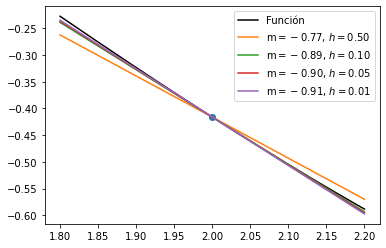

In [6]:
def f(x):
    return np.cos(x)

def df(x):
    return -np.sin(x)

x0=2
xmin=1.8
xmax=2.2

x=np.linspace(xmin,xmax,1000)
y=f(x)

h=[0.5,0.1,0.05,0.01]

h=np.array(h)
m=np.zeros(len(h))

plt.plot(x,y,color='black',label='Función')
plt.plot(x0,f(x0),'o')

for i in range(0,len(h)):
    m[i]=(f(x0+h[i])-f(x0))/h[i]
    
    def rect_tan(x):
        return f(x0)+m[i]*(x-x0)
    
    print('h=',h[i],'error',abs(df(x0)-m[i]))
    plt.plot(x,rect_tan(x),label="m$=%1.2f$, $h=%1.2f$"%(m[i],h[i]))
    
plt.legend()

# Diferencias divididas

Series de Taylor:

$$f(x)=\sum_n^\infty \frac{f^{(n)}(x_0)}{n!}(x-x_0)$$

### Primer orden (Diferencia hacia adelante)

$$f(x)=f(x_0)+f'(x_0)(x-x_0)+\sum_{n=2}^\infty \frac{f^{(n)}(x_0)}{n!}(x-x_0)$$

$$f(x)\approx f(x_0)+f'(x_0)(x-x0)$$ 

$$x-x_0=h$$

$$f(x_0+h)\approx f(x_0)+f'(x_0)h$$

$$\boxed{f'(x_0)=\frac{f(x_0+h)-f(x_0)}{h}}$$

### Segundo orden (Diferencia Central)

$$f(x)=f(x_0)+f'(x_0)(x-x0)+\frac{f''(x_0)}{2}(x-x_0)^2+\sum_{n=3}^\infty \frac{f^{(n)}(x_0)}{n!}(x-x_0)$$

$$f(x) \approx f(x_0)+f'(x_0)(x-x0)+\frac{f''(x_0)}{2}(x-x_0)^2$$

$$x-x_0=h$$

$$x-x_0=-h$$

$$f(x_0+h)\approx f(x_0)+f'(x_0)h+\frac{f''(x_0)}{2}h^2$$

$$f(x_0-h)\approx f(x_0)-f'(x_0)h+\frac{f''(x_0)}{2}h^2$$

$$f(x_0+h)-f(x_0-h)=2f'(x_0)h$$

$$f(x_0+h)+f(x_0-h)=2f(x_0)+f''(x_0)h^2$$

$$\boxed{f'(x_0)=\frac{f(x_0+h)-f(x_0-h)}{2 h}}$$

$$\boxed{f''(x_0)=\frac{f(x_0+h)+f(x_0-h)-2f(x_0)}{h^2}}$$

# Resumen

$$f'(x_i)=\frac{f(x_i+\Delta x)-f(x_i)}{\Delta x}$$

$$f'(x_i)=\frac{f(x_i+\Delta x)-f(x_i-\Delta x)}{2 \Delta x}$$

$$f''(x_i)=\frac{f(x_i+\Delta x)+f(x_i-\Delta x)-2f(x_i)}{{\Delta x}^2}$$

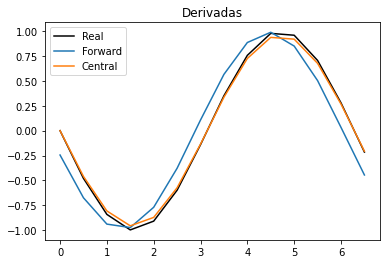

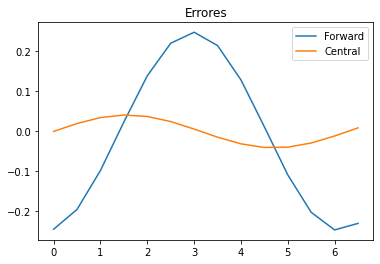

In [7]:
def f(x):
    return np.cos(x)

def df(x):
    return -np.sin(x)

xmin=0
xmax=2*np.pi
delta=0.5

x=np.arange(xmin,xmax+delta,delta)

rdf=df(x) #Real
fdf=np.zeros(len(x)) #Forward
cdf=np.zeros(len(x)) #Central

for i in range(0, len(x)):
    fdf[i]=(f(x[i]+delta)-f(x[i]))/(delta)
    cdf[i]=(f(x[i]+delta)-f(x[i]-delta))/(2*delta)

plt.figure()
plt.title('Derivadas')
plt.plot(x,rdf,color='black',label='Real')
plt.plot(x,fdf,label='Forward')
plt.plot(x,cdf,label='Central')

plt.legend()

plt.figure()
plt.title('Errores')
plt.plot(x,fdf-rdf,label='Forward')
plt.plot(x,cdf-rdf,label='Central')

plt.legend()

# Otra notación

$$x_i\pm \Delta x = x_{i \pm 1}$$

$$f(x_i)=f_i$$

# Si no conocemos la expresión analitica de $f$

$$f'_i=\frac{f_{i+1}-f_i}{\Delta x}$$

$$f'_i=\frac{f_{i+1}-f_{i-1}}{2\Delta x}$$

$$f''_i=\frac{f_{i+1}+f_{i-1}-2f_i}{{\Delta x}^2}$$

<img src="Diferencias.png" alt="drawing" width="500"/>


In [8]:
#mostrar waves